In [1]:
#Import Libraries

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#Import Data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\david\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Filter for job title and region

df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

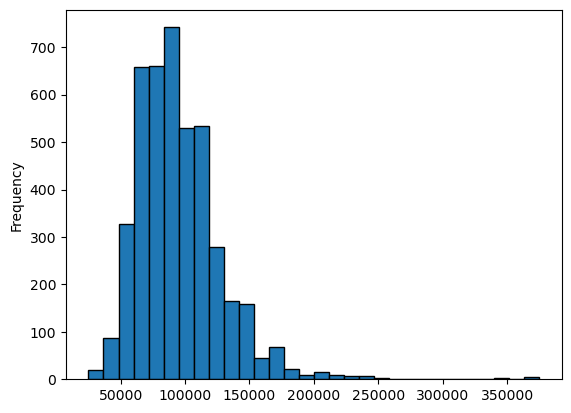

In [5]:
#Create histogram of salary

df_DA_US['salary_year_avg'].plot(kind = 'hist', bins = 30, edgecolor = 'black')
plt.show()

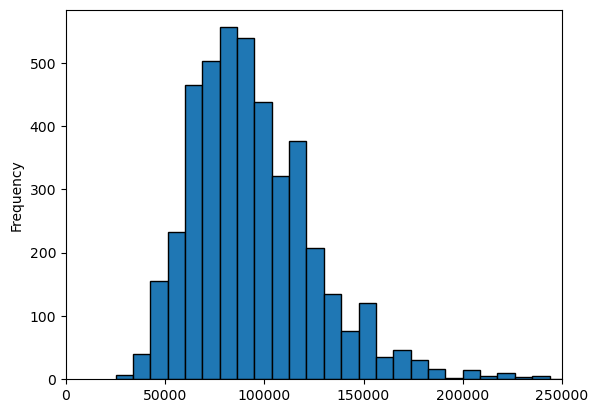

In [7]:
#Trim out the outliers

df_DA_US['salary_year_avg'].plot(kind = 'hist', bins = 40, edgecolor = 'black')
plt.xlim(0, 250000)
plt.show()

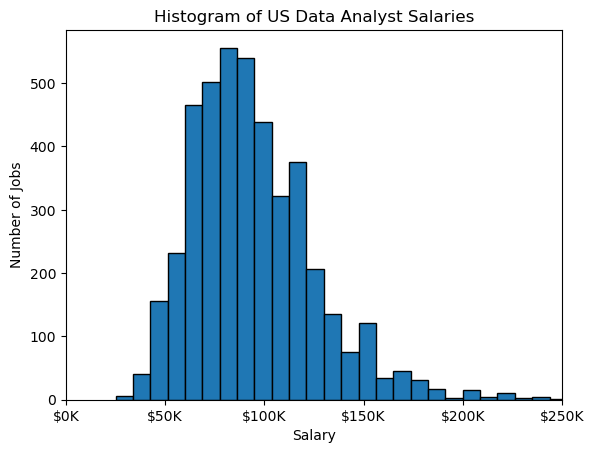

In [9]:
#Extra formatting

df_DA_US['salary_year_avg'].plot(kind = 'hist', bins = 40, edgecolor = 'black')
plt.xlim(0, 250000)
plt.title('Histogram of US Data Analyst Salaries')
plt.xlabel('Salary')
plt.ylabel('Number of Jobs')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.show()